## Applying one hot encoding, bag of words, TF-IDF technics on the Data vectors collected during the lab 1.

In [2]:
from pymongo import MongoClient
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client["scrapy_db"]
collection = db["articles"]

# Retrieve data from MongoDB
data = [article['text'] for article in collection.find()]

# Apply one hot encoding
cv = CountVectorizer(binary=True)
one_hot_encoded = cv.fit_transform(data)

# Apply bag of words
cv = CountVectorizer()
bag_of_words = cv.fit_transform(data)

# Apply TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data)

# Print the shapes of the matrices
print("One Hot Encoded shape:", one_hot_encoded)
print("Bag of Words shape:", bag_of_words)
print("TF-IDF shape:", tfidf_matrix)


One Hot Encoded shape:   (1, 3796)	1
  (1, 2808)	1
  (1, 2943)	1
  (1, 1031)	1
  (1, 2322)	1
  (1, 1811)	1
  (1, 434)	1
  (1, 2492)	1
  (1, 2879)	1
  (1, 148)	1
  (1, 235)	1
  (1, 903)	1
  (1, 1667)	1
  (1, 3106)	1
  (1, 4581)	1
  (1, 2285)	1
  (1, 587)	1
  (1, 3616)	1
  (1, 1810)	1
  (1, 3913)	1
  (1, 1867)	1
  (1, 3954)	1
  (1, 389)	1
  (1, 1674)	1
  (1, 1369)	1
  :	:
  (135, 875)	1
  (135, 4406)	1
  (135, 798)	1
  (135, 1712)	1
  (135, 2694)	1
  (135, 4543)	1
  (135, 3600)	1
  (135, 1730)	1
  (135, 2436)	1
  (135, 3042)	1
  (135, 124)	1
  (135, 411)	1
  (135, 350)	1
  (135, 3210)	1
  (135, 838)	1
  (135, 2845)	1
  (135, 2516)	1
  (135, 4602)	1
  (135, 4538)	1
  (135, 2270)	1
  (135, 345)	1
  (135, 3314)	1
  (135, 49)	1
  (135, 1449)	1
  (135, 810)	1
Bag of Words shape:   (1, 3796)	1
  (1, 2808)	1
  (1, 2943)	1
  (1, 1031)	1
  (1, 2322)	1
  (1, 1811)	1
  (1, 434)	2
  (1, 2492)	1
  (1, 2879)	1
  (1, 148)	1
  (1, 235)	1
  (1, 903)	2
  (1, 1667)	2
  (1, 3106)	3
  (1, 4581)	1
  (1, 2285)

## Applying one Word2Vec Approach (Skip Gram, CBOW) on the same DataSet.

In [3]:
from gensim.models import Word2Vec
# Tokenize your data (assuming it's already preprocessed and tokenized)
tokenized_data = [article.split() for article in data]

# Define Word2Vec models - Skip Gram and CBOW
skipgram_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, sg=1)
cbow_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, sg=0)

# Get vectors for each word in the vocabulary
skipgram_vectors = skipgram_model.wv
cbow_vectors = cbow_model.wv

# Example of accessing vectors
print("Vector for 'زلزال' using Skip Gram:", skipgram_vectors['زلزال'])
print("Vector for 'زلزال' using CBOW:", cbow_vectors['زلزال'])


Vector for 'زلزال' using Skip Gram: [-1.87905639e-01  3.34473610e-01  8.67519006e-02 -2.11575642e-01
  7.09719807e-02 -5.42449988e-02  1.70804933e-02  1.79454952e-01
 -5.25024571e-02 -1.02244459e-01 -2.39311397e-01 -1.58992514e-01
  1.14996664e-01  8.05865452e-02  4.38586958e-02  5.32816462e-02
  1.69888675e-01  1.45021230e-01 -2.45323852e-02 -1.78469002e-01
 -3.28017697e-02  5.88213988e-02 -7.23069385e-02 -4.86530848e-02
 -7.40348995e-02  6.30623428e-03 -1.75606817e-01 -1.10185184e-02
 -2.30558649e-01  1.67198405e-01  2.26065740e-01  1.27252400e-01
  2.13108622e-02 -9.10584331e-02  1.16701417e-01  2.08610222e-01
 -1.71057373e-01 -1.37274876e-01  2.96603180e-02 -2.33391881e-01
  1.46985456e-01 -1.21134877e-01  1.22475317e-02  1.29758343e-02
  1.91915557e-01  6.25574775e-03 -1.08404644e-01 -1.61098165e-03
 -2.40017653e-01  4.08811569e-02 -1.08623430e-01 -2.73504913e-01
  2.69455034e-02  3.23639251e-02 -1.44688874e-01  1.15788601e-01
 -7.76254684e-02 -8.72103125e-03 -1.27673056e-02  7.44

## Applying Glove and FastText approaches on the same DataSet.

In [4]:
from gensim.models import FastText

# Apply Glove
glove_model = FastText(sentences=tokenized_data, vector_size=100, window=5, sg=1)

# Apply FastText
fasttext_model = FastText(sentences=tokenized_data, vector_size=100, window=5, sg=0)
word = 'زلزال'
# Example of accessing word vectors
print("Word Vector for '{}' (GloVe):\n".format(word), glove_model.wv[word])
print("Word Vector for '{}' (FastText):\n".format(word), fasttext_model.wv[word])


Word Vector for 'زلزال' (GloVe):
 [ 0.24545978  0.11361224  0.2905674  -0.09636194 -0.07961976  0.00662173
 -0.03720411  0.05761869 -0.19715883  0.10614005  0.04833583 -0.05404523
  0.207144   -0.28023818 -0.03079486 -0.01830378 -0.09299301  0.05928085
 -0.21809554  0.05085019  0.05908624 -0.02292368 -0.11711504  0.29968622
 -0.07849164  0.09046414 -0.01302249  0.04672592  0.0148574   0.41670582
 -0.10825606  0.31364888  0.13320318  0.08006169  0.02149717  0.22818784
 -0.25061828 -0.35444057  0.11637906  0.26571843  0.23824562  0.18711281
  0.1588181  -0.05050062  0.0600335   0.10698047  0.02478377 -0.46632704
  0.00169068  0.06788138 -0.0281364  -0.02536819 -0.0364467  -0.03854368
 -0.14653762 -0.01944917  0.12683484  0.21933743  0.44431373  0.4347159
  0.22532052  0.3467205   0.08929726  0.33472583 -0.03877662  0.06236646
  0.07244652  0.09810313 -0.20620163  0.06669794  0.01854229 -0.12484268
  0.3117684  -0.338234   -0.12791282  0.12449045  0.102479   -0.2388585
 -0.14657119 -0.023

## Ploting all the encoded / vectorized vectors by using Tsne Algorithm, evaluate those approaches 

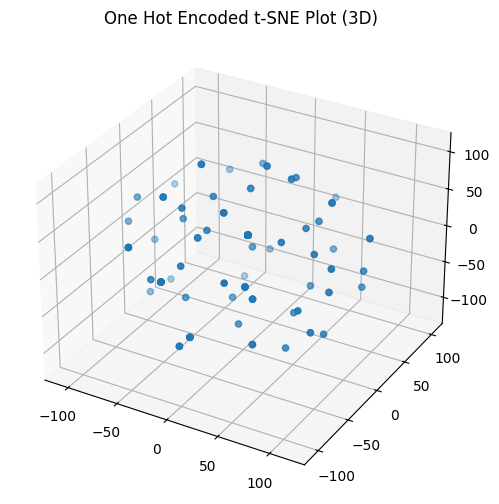

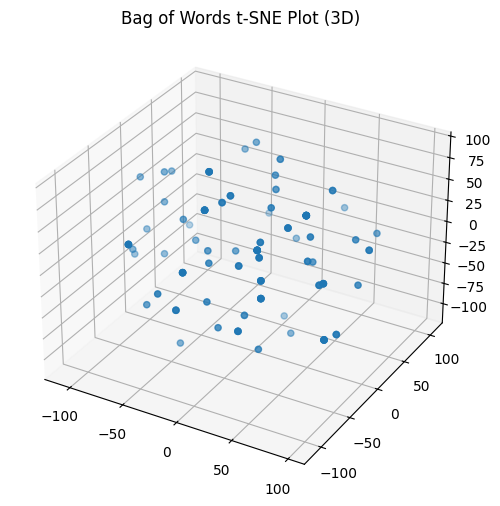

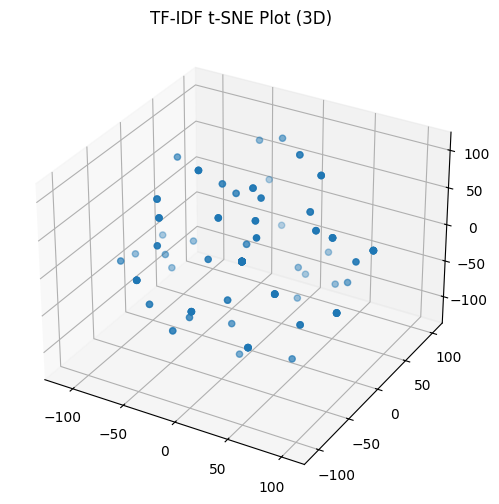

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to plot vectors using t-SNE in 3D
def plot_vectors_3d(vectors, model_name):
    tsne = TSNE(n_components=3, random_state=0)
    vectors_tsne = tsne.fit_transform(vectors)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], vectors_tsne[:, 2])
    ax.set_title(f'{model_name} t-SNE Plot (3D)')
    plt.show()

# Plotting all the encoded/vectorized vectors in 3D
plot_vectors_3d(one_hot_encoded.toarray(), 'One Hot Encoded')
plot_vectors_3d(bag_of_words.toarray(), 'Bag of Words')
plot_vectors_3d(tfidf_matrix.toarray(), 'TF-IDF')




In [13]:
import numpy as np
all_vectors_array = np.concatenate((skipgram_vectors.vectors, cbow_vectors.vectors), axis=0)

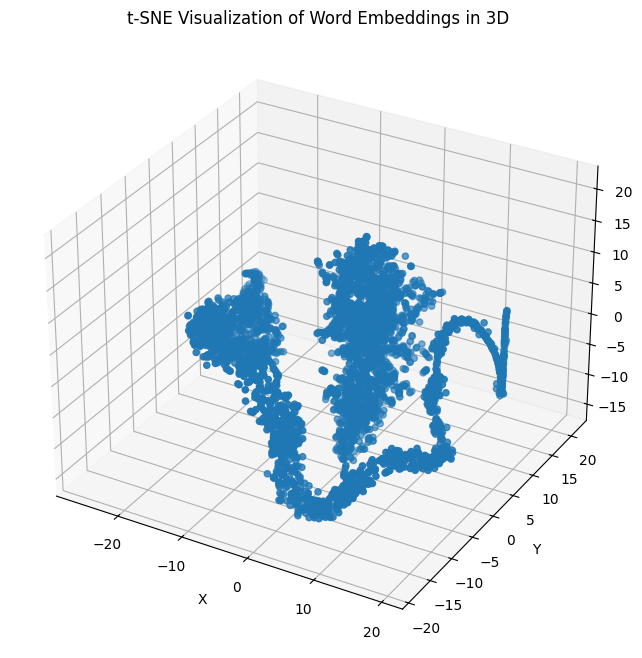

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE with 3 components for 3D visualization
tsne_3d = TSNE(n_components=3, random_state=42)
vectors_tsne_3d = tsne_3d.fit_transform(all_vectors_array)

# Plot the vectors in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_tsne_3d[:, 0], vectors_tsne_3d[:, 1], vectors_tsne_3d[:, 2])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('t-SNE Visualization of Word Embeddings in 3D')
plt.show()


## Evaluation and Conclusion:
#### One Hot Encoding: This approach creates binary vectors, resulting in a sparse representation where vectors are orthogonal to each other. It's straightforward but may not capture semantic relationships.
#### Bag of Words (BoW): BoW represents word frequency in the text but doesn't consider word order. It's simple but lacks context.
#### TF-IDF: TF-IDF considers word frequency and inverse document frequency, giving more weight to rare words. It helps in capturing important terms but may not handle semantics well.
#### Word2Vec (Skip Gram and CBOW): Word2Vec captures semantic relationships by mapping words to continuous vector spaces. Skip Gram focuses on context words, while CBOW predicts target words from context.
#### GloVe and FastText: These methods also create word embeddings but incorporate global word co-occurrence statistics (GloVe) or subword information (FastText), enhancing semantic understanding.

#### In the t-SNE plot, you may observe clusters or patterns that indicate how well each approach captures semantic similarities or differences. For instance, Word2Vec models (Skip Gram and CBOW) often show clusters indicating semantic relationships. GloVe and FastText may also exhibit similar clustering patterns.